In [2]:
'''
Plate notation is so damn cool - look it up if you come back to this and have forgotten what it is.
You can bin any continuous quantity - so returns, prices, # of stddev above/below mean price can all be binned and 
distributed.
Latent Dirichlet (DEER-ISH-LAY) Allocation is
1. Latent because a documents topic is not directly observe, so the variable is latent
2. Dirichlet because the distributions follow that distribution family
3. Allocation because you are allocation documents to a topic
4. Each Document gets a distribution of belonging-ness to a topic
5. Each word in each document gets a distribution of what topic it suggests
6. The words themselves are the only observable variables, all other distributions and the topics 
    in those distributions are latent
''' 


'\nPlate notation is so damn cool - look it up if you come back to this and have forgotten what it is.\nYou can bin any continuous quantity - so returns, prices, # of stddev above/below mean price can all be binned and \ndistributed.\nLatent Dirichlet (DEER-ISH-LAY) Allocation is\n1. Latent because a documents topic is not directly observe, so the variable is latent\n2. Dirichlet because the distributions follow that distribution family\n3. Allocation because you are allocation documents to a topic\n4. Each Document gets a distribution of belonging-ness to a topic\n5. Each word in each document gets a distribution of what topic it suggests\n6. The words themselves are the only observable variables, all other distributions and the topics \n    in those distributions are latent\n'

In [ ]:
'''
The way Fourier expansion works is to add sin(x) + 3sin(x)/3 ………… etc. until you get to the waveform you want
The coefficients and the number of terms to expand to is determined by the period of the wave being decomposed

See here: https://www.mathsisfun.com/calculus/fourier-series.html

A sine wave's net integral over a period is 0
'''

In [3]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [15]:
filename = 'tr_eikon_eod_data.csv'
f = open(filename, 'r')
f.readlines()[:5] # Header and first four lines

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [17]:
data = pd.read_csv(filename, index_col=0, parse_dates=True) # What column are dates? Coerce datestrings to Dates?
data[:5]

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [19]:
data.describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2216.000000,2211.000000,2138.000000,2138.00000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
25%,60.294225,28.566875,22.510000,213.595000,146.607500,133.987500,1338.567500,13.072500,1.131500,1221.525000,22.142500,117.40250
50%,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500
75%,117.235000,54.372500,34.710000,698.850000,192.132500,210.987500,2108.942500,19.067500,1.345400,1428.240000,48.342500,139.00250
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119b0f2e8>,
      dtype=object)

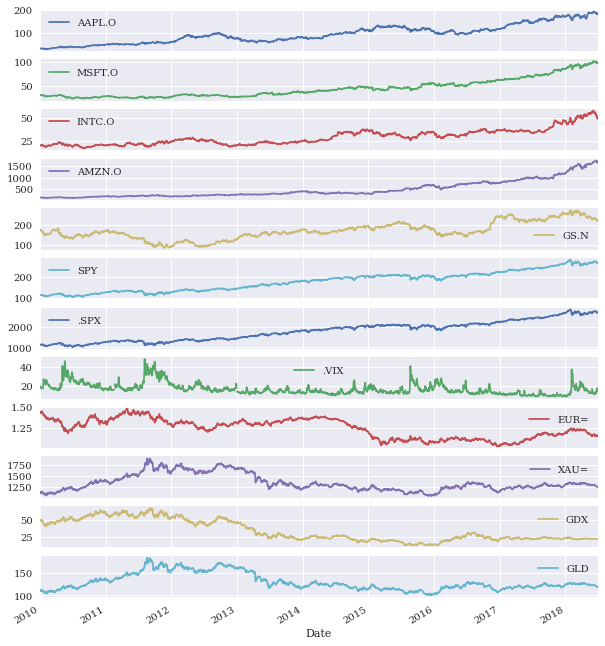

In [21]:
data.plot(figsize=(10, 12), subplots=True) # Plot every column in one line - cool!

In [22]:
instruments = ['Apple Stock', 'Microsoft Stock',
                       'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
                       'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
                       'VIX Volatility Index', 'EUR/USD Exchange Rate',
                       'Gold Price', 'VanEck Vectors Gold Miners ETF',
                       'SPDR Gold Trust']

In [23]:
for ric, name in zip(data.columns, instruments): # zip combines two matrices element wise
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [25]:
data.diff().head() # Subtraction change

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [26]:
data.diff().mean() # Fluent chaining

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [27]:
data.pct_change().round(3).head() # simple return

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


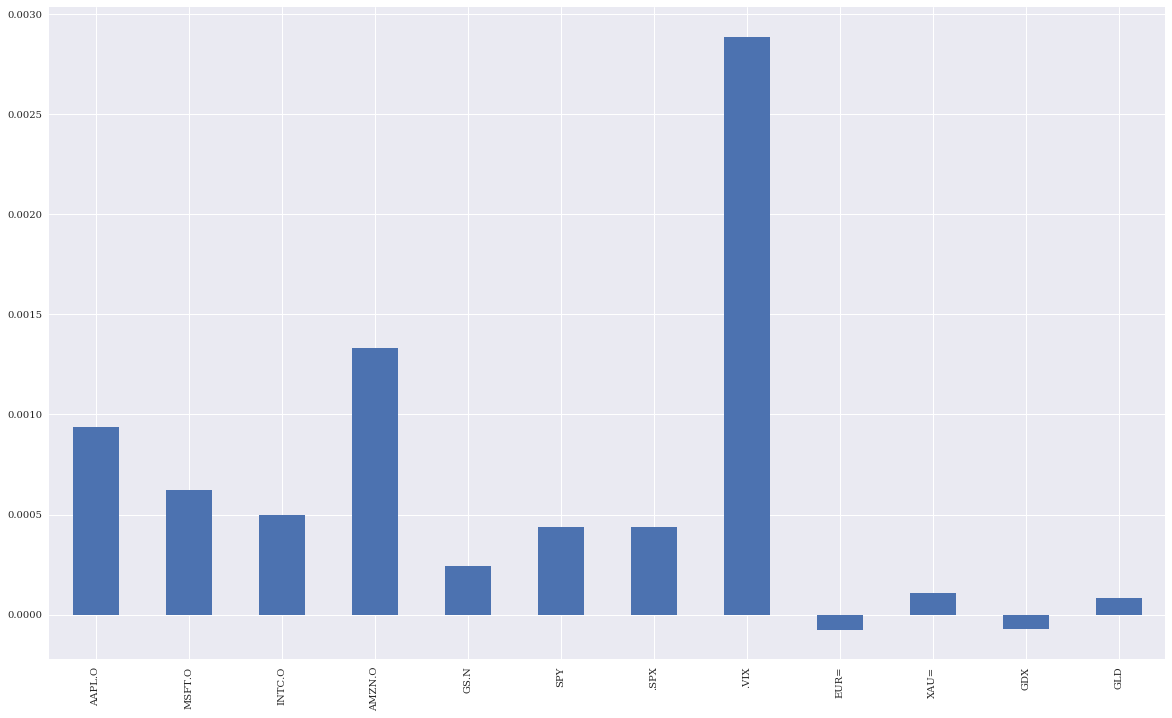

In [28]:
data.pct_change().mean().plot(kind='bar', figsize=(20,12))

In [31]:
# Log returns better for finance obvi
rets = np.log(data / data.shift(1))
rets.head(5).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.02,NaN,NaN
2010-01-05,0.00,0.00,-0.00,0.01,0.02,0.0,0.0,-0.04,-0.00,-0.00,0.01,-0.00
2010-01-06,-0.02,-0.01,-0.00,-0.02,-0.01,0.0,0.0,-0.01,0.00,0.02,0.02,0.02
2010-01-07,-0.00,-0.01,-0.01,-0.02,0.02,0.0,0.0,-0.01,-0.01,-0.01,-0.00,-0.01


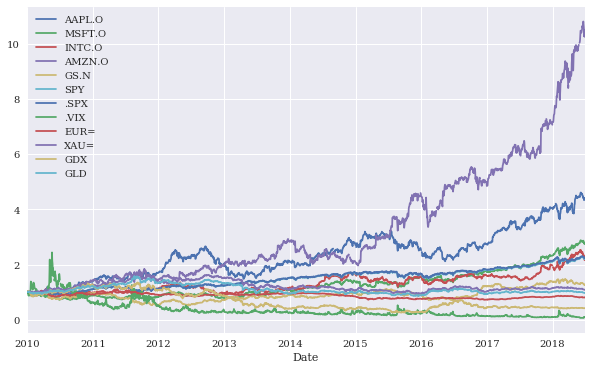

In [32]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

In [36]:
# Resample - combine data to 1w - ALWAYS USE THE RIGHT LABEL - otherwise your resampled models will have foresight
# bias because they will see the returns of a period at the beginning of the period.
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [37]:
# Resample monthly
data.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


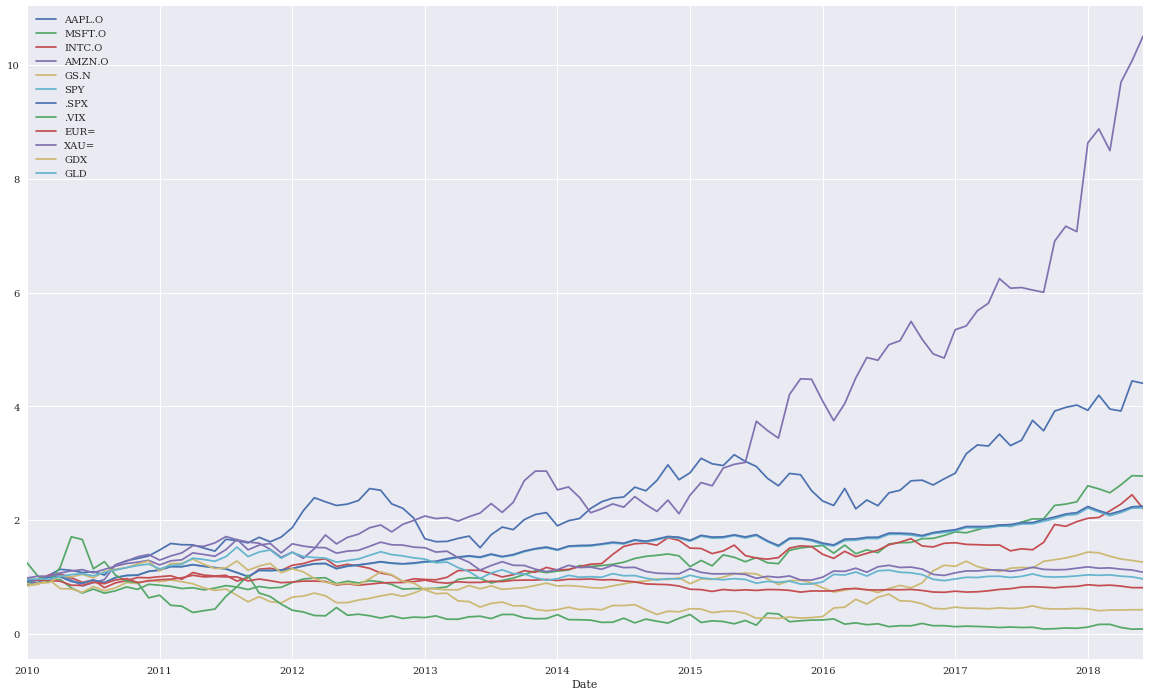

In [35]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(20,12))

In [38]:
# Rolling statistics
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()

In [39]:
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11
